In [1]:
!pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 111 kB 5.0 MB/s 
     |████████████████████████████████| 96 kB 4.8 MB/s 
     |████████████████████████████████| 26.7 MB 16.9 MB/s 
     |████████████████████████████████| 255.9 MB 40 kB/s 
     |████████████████████████████████| 72 kB 746 kB/s 
     |████████████████████████████████| 3.2 MB 44.9 MB/s 
     |████████████████████████████████| 2.0 MB 44.4 MB/s 
     |████████████████████████████████| 1.6 MB 50.6 MB/s 
     |████████████████████████████████| 121 kB 69.4 MB/s 
     |████████████████████████████████| 83 kB 1.9 MB/s 
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 6.0.1
    Uninstalling pyarrow-6.0.1:
      Successfully uninstalled pyarrow-6.0.1
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0
  Attempting uninstall: xgb

In [66]:
import pandas as pd
from google.colab import drive
from featurewiz import FeatureWiz
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [35]:
df_non_encoded = pd.read_csv('/content/drive/Shareddrives/CMPE255/drug_data_1.csv')
df_non_encoded.drop(['Unnamed: 0', 'CASEID', 'YEAR', 'QUARTER', 'DAYPART'], axis = 1, inplace = True)

In [47]:
df_encoded = pd.read_csv('/content/drive/Shareddrives/CMPE255/final_data_encoded.csv')
df_encoded.drop(['Unnamed: 0'], inplace = True, axis = 1)

### Sulov for y_train = ALLABUSE and data is not encoded







wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.6
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (175160, 49)
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows fro

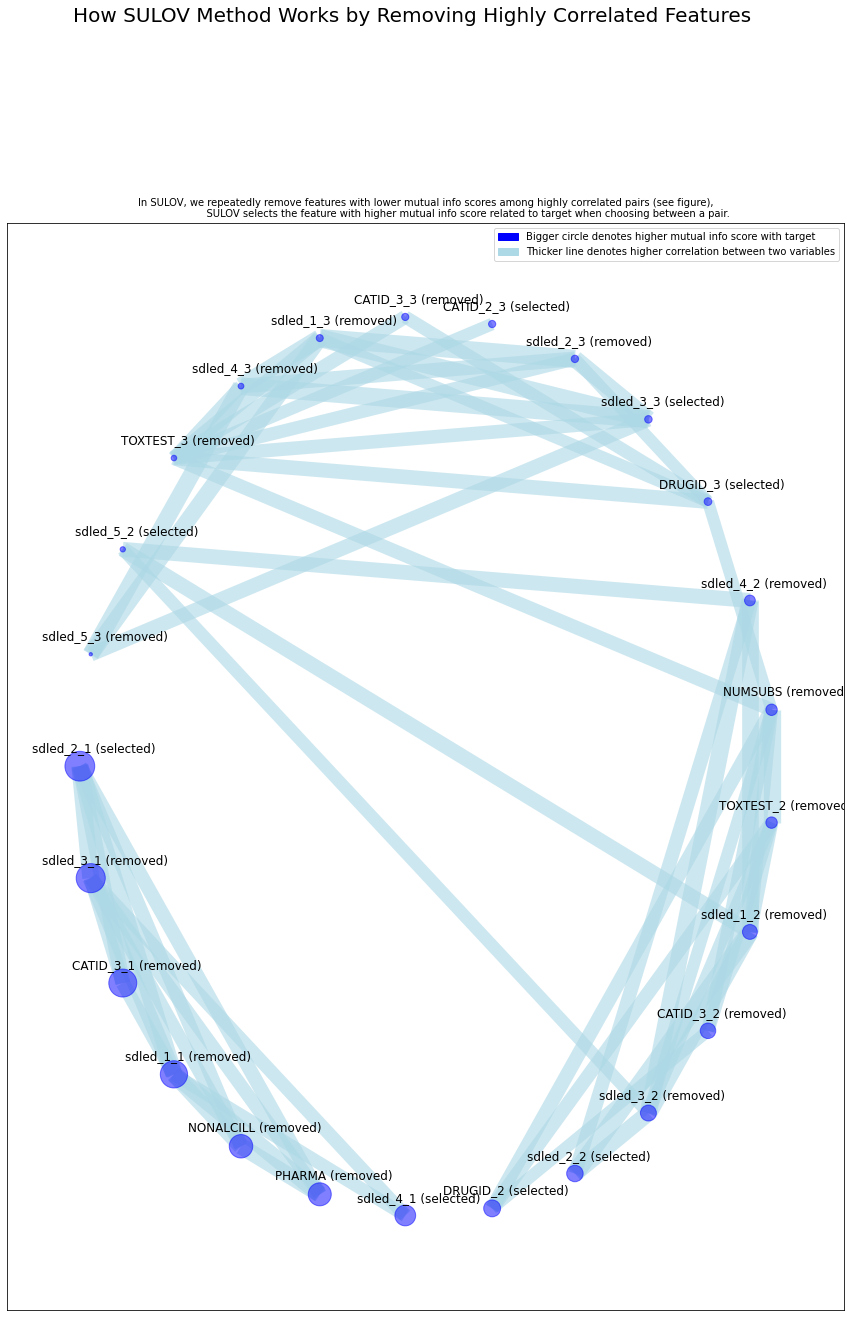

Time taken for SULOV method = 40 seconds
    Adding 0 categorical variables to reduced numeric variables  of 31
Finally 31 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 31 
    Taking top 12 features per iteration...
    XGBoost version using 1.6.2 as tree method: gpu_hist
Number of booster rounds = 20
        using 31 variables...
Regular XGBoost is crashing due to: [21:21:04] ../src/gbm/gbtree.cc:597: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/lib/libxgboost.so(+0x1e4459) [0x7fc6889

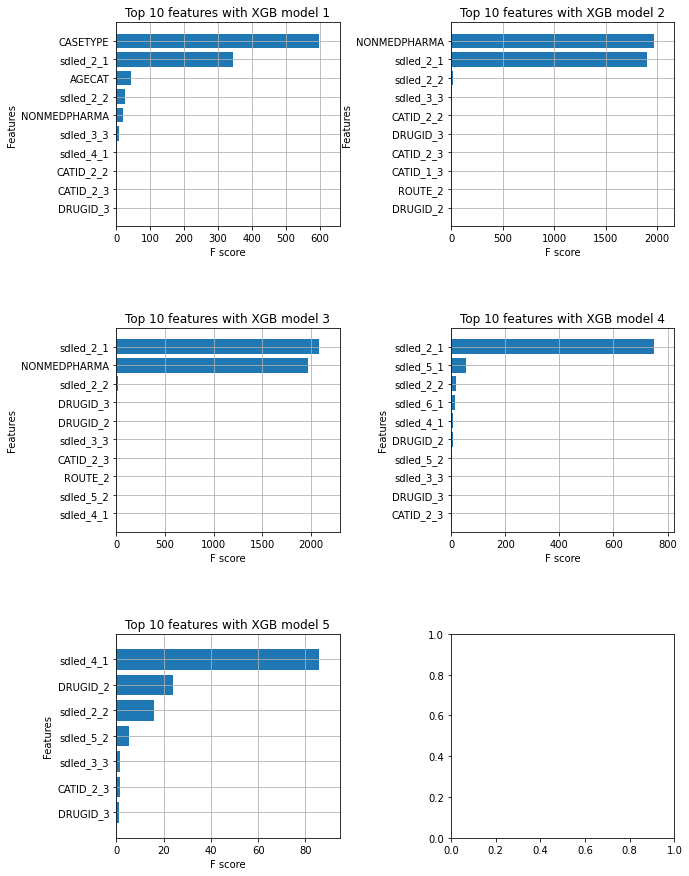

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 13 important features:
['CASETYPE', 'sdled_2_1', 'AGECAT', 'sdled_2_2', 'NONMEDPHARMA', 'sdled_3_3', 'sdled_4_1', 'CATID_2_2', 'CATID_2_3', 'DRUGID_3', 'DRUGID_2', 'sdled_5_1', 'sdled_6_1']
Total Time taken for featurewiz selection = 45 seconds
Output contains a list of 13 important features and a train dataframe
    Time taken to create entire pipeline = 46 second(s)


In [38]:
X = df_non_encoded.drop(['ALLABUSE'], axis = 1)
y = df_non_encoded[['ALLABUSE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sulov = FeatureWiz(corr_limit = 0.6, verbose = 2)
X_train_selected = sulov.fit_transform(X_train, y_train)
X_test_selected = sulov.transform(X_test)

In [39]:
X_train_selected = pd.concat([X_train_selected, y_train], axis = 1)
X_test_selected = pd.concat([X_test_selected, y_test], axis = 1)

X_train_selected.to_csv('/content/drive/Shareddrives/CMPE255/non_encoded_sulov_target_allabuse_train.csv')
X_test_selected.to_csv('/content/drive/Shareddrives/CMPE255/non_encoded_sulov_target_allabuse_test.csv')

### Sulov for y_train = CASETYPE and data is not encoded

wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.6
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (175160, 49)
#### Single_Label Multi_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from 

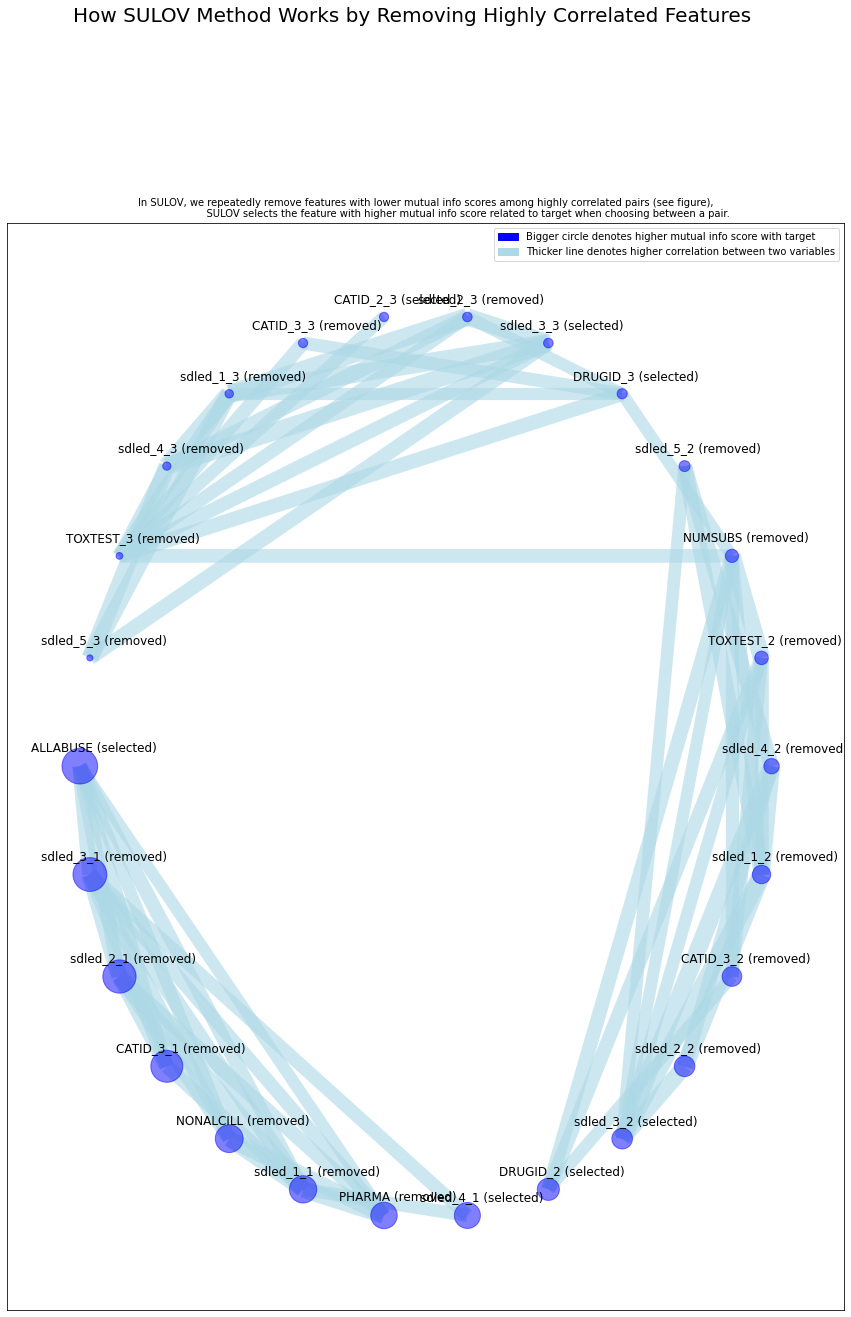

Time taken for SULOV method = 40 seconds
    Adding 0 categorical variables to reduced numeric variables  of 29
Final list of selected 29 vars after SULOV = ['AGECAT', 'ALCOHOL', 'CASEWGT', 'CATID_1_1', 'CATID_1_2', 'CATID_1_3', 'CATID_2_1', 'CATID_2_2', 'DISPOSITION', 'DRUGID_1', 'METRO', 'NONMEDPHARMA', 'RACE', 'ROUTE_1', 'ROUTE_2', 'ROUTE_3', 'SEX', 'TOXTEST_1', 'sdled_5_1', 'sdled_6_1', 'sdled_6_2', 'sdled_6_3', 'ALLABUSE', 'sdled_4_1', 'DRUGID_2', 'sdled_3_2', 'DRUGID_3', 'sdled_3_3', 'CATID_2_3']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 29 
    Taking top 12 features per iteration...
    XGBoost version using 1.6.2 as

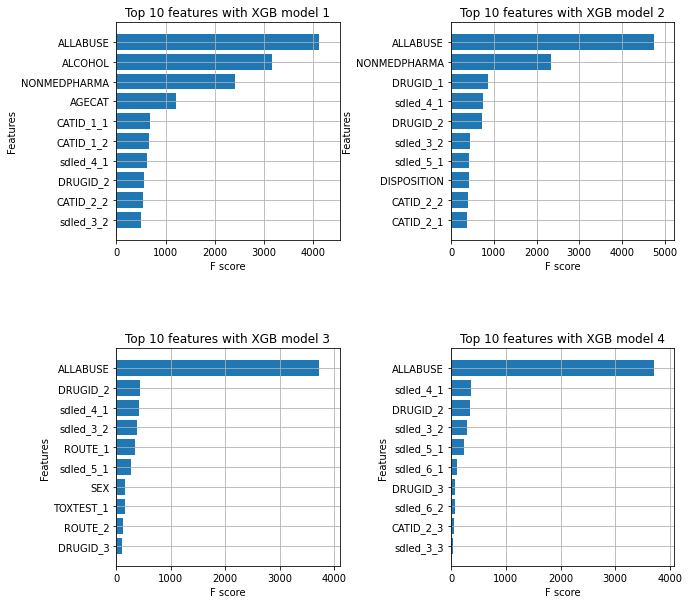

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 18 important features:
['ALLABUSE', 'ALCOHOL', 'NONMEDPHARMA', 'AGECAT', 'CATID_1_1', 'CATID_1_2', 'sdled_4_1', 'DRUGID_2', 'CATID_2_2', 'sdled_3_2', 'DISPOSITION', 'sdled_5_1', 'sdled_6_1', 'DRUGID_1', 'CATID_2_1', 'ROUTE_1', 'SEX', 'TOXTEST_1']
Total Time taken for featurewiz selection = 61 seconds
Output contains a list of 18 important features and a train dataframe
    Time taken to create entire pipeline = 62 second(s)


In [42]:
X = df_non_encoded.drop(['CASETYPE'], axis = 1)
y = df_non_encoded[['CASETYPE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sulov = FeatureWiz(corr_limit = 0.6, verbose = 2)
X_train_selected = sulov.fit_transform(X_train, y_train)
X_test_selected = sulov.transform(X_test)

In [43]:
X_train_selected = pd.concat([X_train_selected, y_train], axis = 1)
X_test_selected = pd.concat([X_test_selected, y_test], axis = 1)

X_train_selected.to_csv('/content/drive/Shareddrives/CMPE255/non_encoded_sulov_target_casetype_train.csv')
X_test_selected.to_csv('/content/drive/Shareddrives/CMPE255/non_encoded_sulov_target_casetype_test.csv')

### Sulov for y_train = ALLABUSE and data is encoded







wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.6
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (175160, 351)
#### Single_Label Binary_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows fr

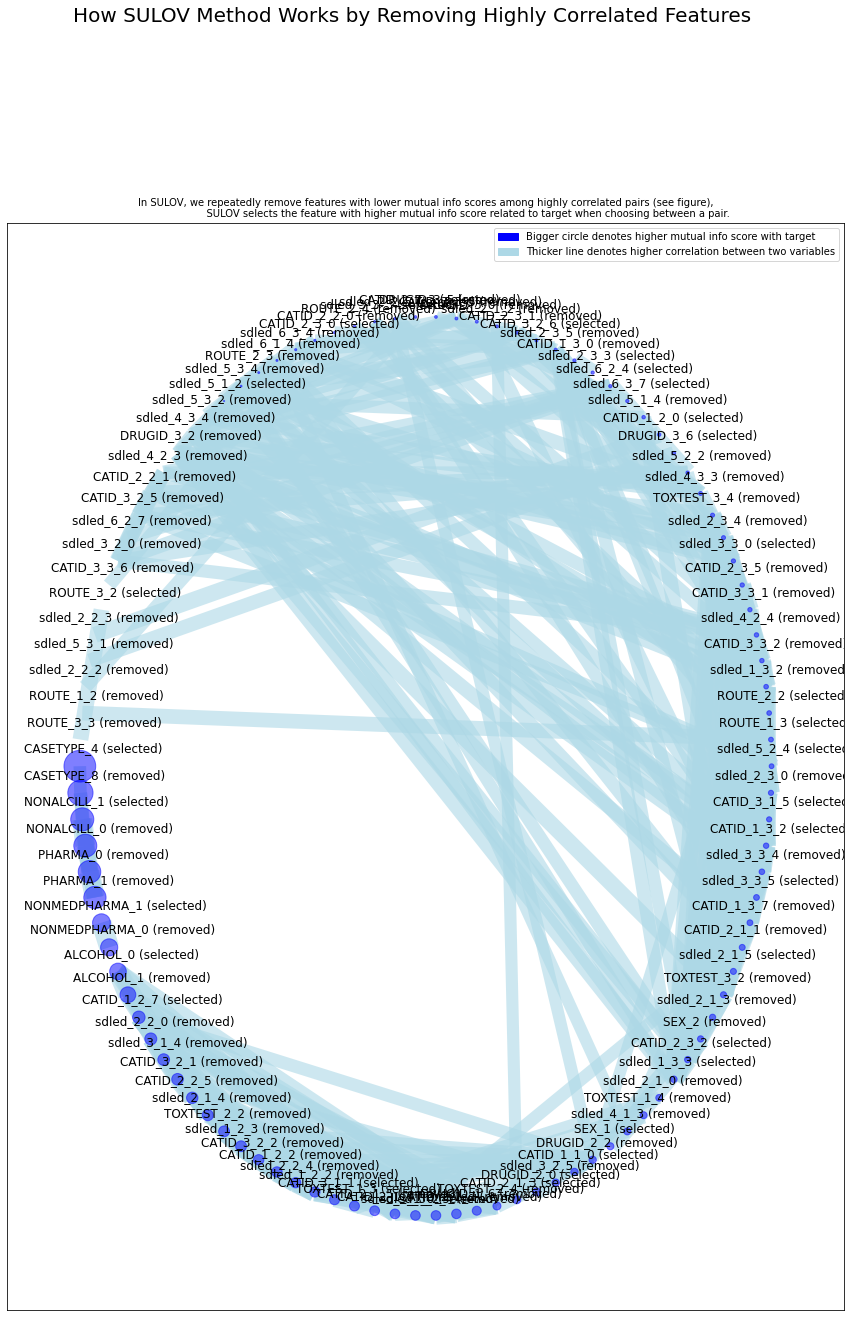

Time taken for SULOV method = 11 seconds
    Adding 0 categorical variables to reduced numeric variables  of 225
Finally 225 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 225 
    Taking top 44 features per iteration...
    XGBoost version using 1.6.2 as tree method: gpu_hist
Number of booster rounds = 20
        using 225 variables...
Regular XGBoost is crashing due to: [21:40:08] ../src/gbm/gbtree.cc:597: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/lib/libxgboost.so(+0x1e4459) [0x7fc

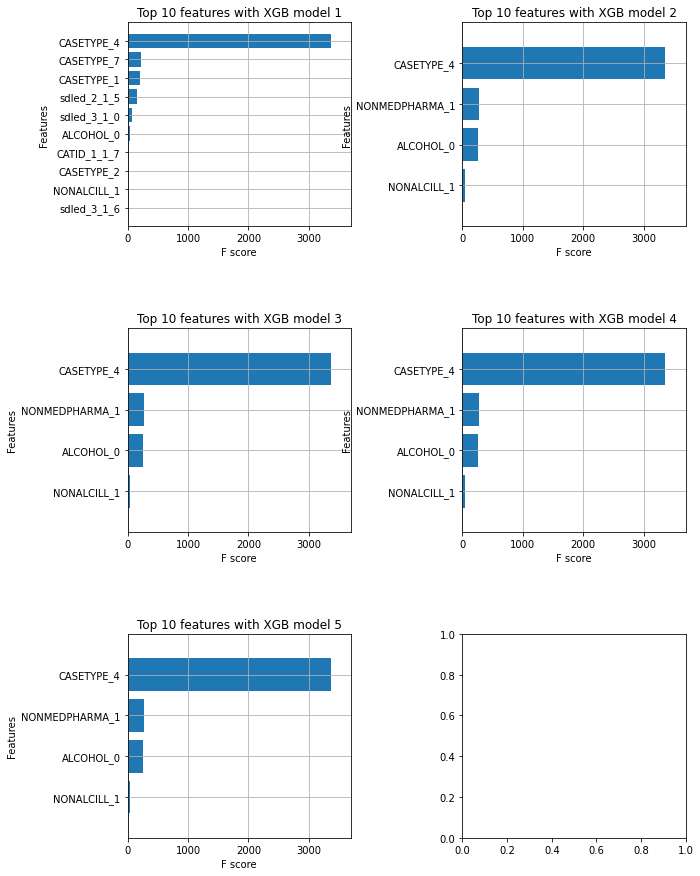

    Completed XGBoost feature selection in 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 11 important features:
['CASETYPE_4', 'CASETYPE_7', 'CASETYPE_1', 'sdled_2_1_5', 'sdled_3_1_0', 'ALCOHOL_0', 'CATID_1_1_7', 'CASETYPE_2', 'NONALCILL_1', 'sdled_3_1_6', 'NONMEDPHARMA_1']
Total Time taken for featurewiz selection = 27 seconds
Output contains a list of 11 important features and a train dataframe
    Time taken to create entire pipeline = 32 second(s)


In [59]:
temp = df_encoded.copy()

temp['ALLABUSE'] = pd.get_dummies(df_encoded[['ALLABUSE_0', 'ALLABUSE_1']]).idxmax(1)
temp.drop(['ALLABUSE_0', 'ALLABUSE_1'], axis = 1, inplace = True)

X = temp.drop(['ALLABUSE'], axis = 1)
y = temp[['ALLABUSE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sulov = FeatureWiz(corr_limit = 0.6, verbose = 2)
X_train_selected = sulov.fit_transform(X_train, y_train)
X_test_selected = sulov.transform(X_test)

In [60]:
y_train = pd.get_dummies(y_train).rename(columns = {'ALLABUSE_ALLABUSE_0':'ALLABUSE_0', 'ALLABUSE_ALLABUSE_1':'ALLABUSE_1'})
y_test = pd.get_dummies(y_test).rename(columns = {'ALLABUSE_ALLABUSE_0':'ALLABUSE_0', 'ALLABUSE_ALLABUSE_1':'ALLABUSE_1'})

X_train_selected = pd.concat([X_train_selected, y_train], axis = 1)
X_test_selected = pd.concat([X_test_selected, y_test], axis = 1)

X_train_selected.to_csv('/content/drive/Shareddrives/CMPE255/encoded_sulov_target_allabuse_train.csv')
X_test_selected.to_csv('/content/drive/Shareddrives/CMPE255/encoded_sulov_target_allabuse_test.csv')

### Sulov for y_train = CASETYPE and data is encoded







wiz = FeatureWiz(verbose=1)
        X_train_selected = wiz.fit_transform(X_train, y_train)
        X_test_selected = wiz.transform(X_test)
        wiz.features  ### provides a list of selected features ###            
        
############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.6
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (175160, 345)
#### Single_Label Multi_Classification problem ####
No test data filename given...
Classifying features using a random sample of 10000 rows from

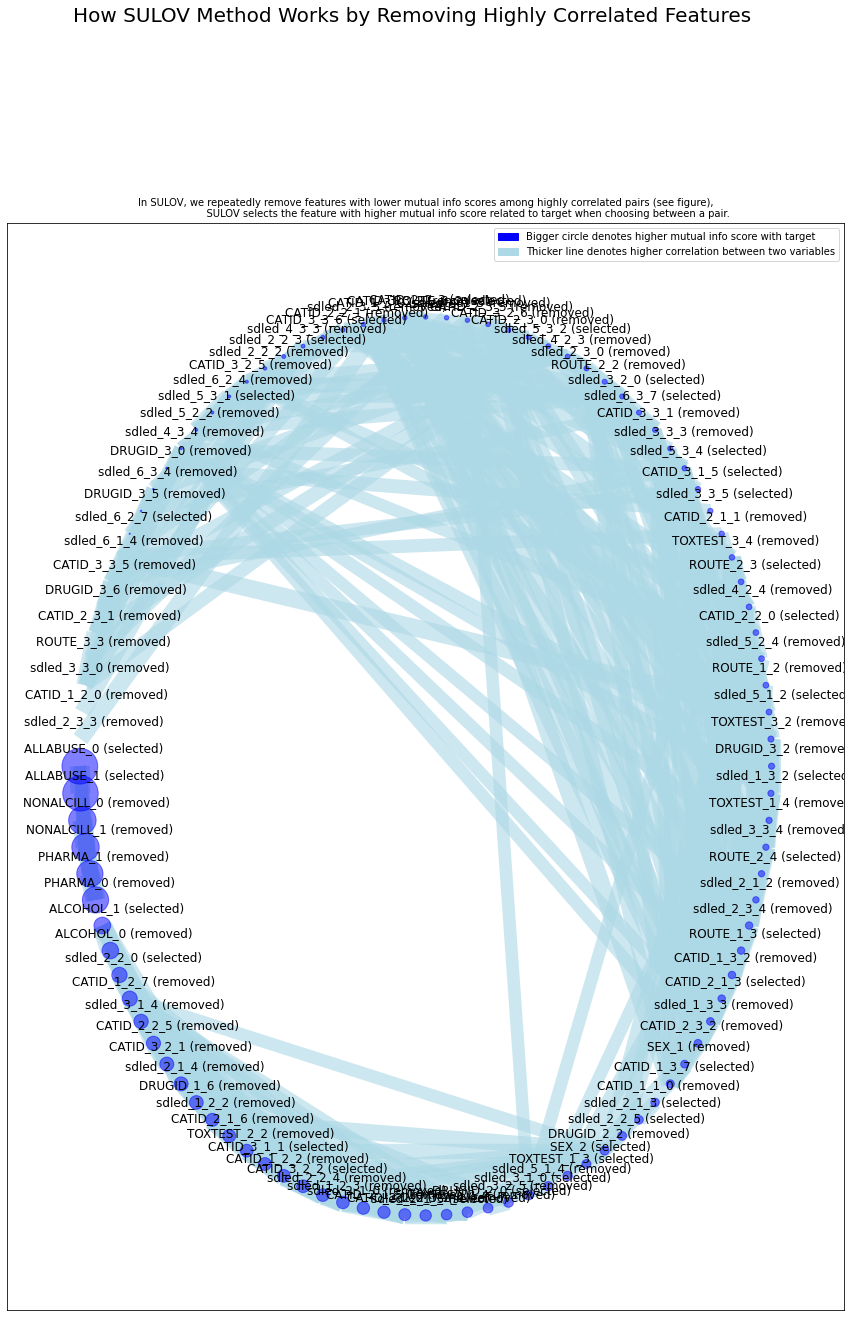

Time taken for SULOV method = 10 seconds
    Adding 0 categorical variables to reduced numeric variables  of 223
Finally 223 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 223 
    Taking top 43 features per iteration...
    XGBoost version using 1.6.2 as tree method: gpu_hist
Number of booster rounds = 20
        using 223 variables...
Regular XGBoost is crashing due to: [21:44:50] ../src/gbm/gbtree.cc:597: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.
Stack trace:
  [bt] (0) /usr/local/lib/python3.7/dist-packages/xgboost/lib/libxgboost.so(+0x1e4459) [0x7fc

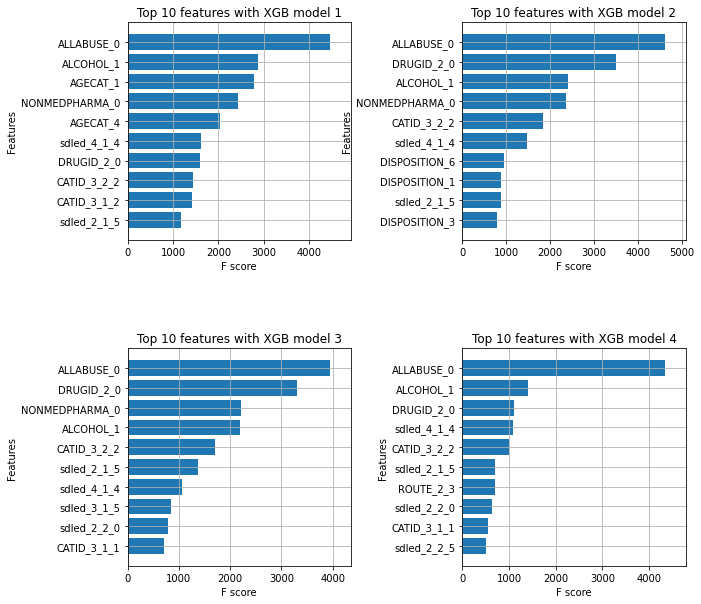

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 126 important features. Too many to print...
Total Time taken for featurewiz selection = 79 seconds
Output contains a list of 126 important features and a train dataframe
    Time taken to create entire pipeline = 84 second(s)


In [61]:
temp = df_encoded.copy()

temp['CASETYPE'] = pd.get_dummies(df_encoded[['CASETYPE_1', 'CASETYPE_2', 'CASETYPE_3', 'CASETYPE_4', 'CASETYPE_5', 'CASETYPE_6', 'CASETYPE_7', 'CASETYPE_8']]).idxmax(1)
temp.drop(['CASETYPE_1', 'CASETYPE_2', 'CASETYPE_3', 'CASETYPE_4', 'CASETYPE_5', 'CASETYPE_6', 'CASETYPE_7', 'CASETYPE_8'], axis = 1, inplace = True)

X = temp.drop(['CASETYPE'], axis = 1)
y = temp[['CASETYPE']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

sulov = FeatureWiz(corr_limit = 0.6, verbose = 2)
X_train_selected = sulov.fit_transform(X_train, y_train)
X_test_selected = sulov.transform(X_test)

In [65]:
y_train = pd.get_dummies(y_train).rename(columns = {'CASETYPE_CASETYPE_1':'CASETYPE_1', 'CASETYPE_CASETYPE_2':'CASETYPE_2', 'CASETYPE_CASETYPE_3':'CASETYPE_3', \
                                                    'CASETYPE_CASETYPE_4':'CASETYPE_4', 'CASETYPE_CASETYPE_5':'CASETYPE_5', 'CASETYPE_CASETYPE_6':'CASETYPE_6', \
                                                    'CASETYPE_CASETYPE_7':'CASETYPE_7', 'CASETYPE_CASETYPE_8':'CASETYPE_8'})
y_test = pd.get_dummies(y_test).rename(columns = {'CASETYPE_CASETYPE_1':'CASETYPE_1', 'CASETYPE_CASETYPE_2':'CASETYPE_2', 'CASETYPE_CASETYPE_3':'CASETYPE_3', \
                                                    'CASETYPE_CASETYPE_4':'CASETYPE_4', 'CASETYPE_CASETYPE_5':'CASETYPE_5', 'CASETYPE_CASETYPE_6':'CASETYPE_6', \
                                                    'CASETYPE_CASETYPE_7':'CASETYPE_7', 'CASETYPE_CASETYPE_8':'CASETYPE_8'})

X_train_selected = pd.concat([X_train_selected, y_train], axis = 1)
X_test_selected = pd.concat([X_test_selected, y_test], axis = 1)

X_train_selected.to_csv('/content/drive/Shareddrives/CMPE255/encoded_sulov_target_casetype_train.csv')
X_test_selected.to_csv('/content/drive/Shareddrives/CMPE255/encoded_sulov_target_casetype_test.csv')

### PCA - target is allabuse

In [68]:
X = df_encoded.drop(['ALLABUSE_0', 'ALLABUSE_1'], axis = 1)
y = df_encoded[['ALLABUSE_0', 'ALLABUSE_1']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pca = PCA(n_components = 0.8).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [73]:
X_train_pca = pd.DataFrame(data = X_train_pca)
X_train_pca = pd.concat([X_train_pca, y_train], axis = 1)

X_test_pca = pd.DataFrame(data = X_test_pca)
X_test_pca = pd.concat([X_test_pca, y_test], axis = 1)

X_train_pca.to_csv('/content/drive/Shareddrives/CMPE255/encoded_pca_target_allabuse_train.csv')
X_test_pca.to_csv('/content/drive/Shareddrives/CMPE255/encoded_pca_target_allabuse_test.csv')

### PCA - target is casetype

In [74]:
X = df_encoded.drop(['CASETYPE_1', 'CASETYPE_2', 'CASETYPE_3', 'CASETYPE_4', 'CASETYPE_5', 'CASETYPE_6', 'CASETYPE_7', 'CASETYPE_8'], axis = 1)
y = df_encoded[['CASETYPE_1', 'CASETYPE_2', 'CASETYPE_3', 'CASETYPE_4', 'CASETYPE_5', 'CASETYPE_6', 'CASETYPE_7', 'CASETYPE_8']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pca = PCA(n_components = 0.8).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [75]:
X_train_pca = pd.DataFrame(data = X_train_pca)
X_train_pca = pd.concat([X_train_pca, y_train], axis = 1)

X_test_pca = pd.DataFrame(data = X_test_pca)
X_test_pca = pd.concat([X_test_pca, y_test], axis = 1)

X_train_pca.to_csv('/content/drive/Shareddrives/CMPE255/encoded_pca_target_casetype_train.csv')
X_test_pca.to_csv('/content/drive/Shareddrives/CMPE255/encoded_pca_target_casetype_test.csv')